In [1]:
from astropy.table import Table as t
import matplotlib.pyplot as plt

base_url = 'https://data.desi.lbl.gov/public/edr/vac/edr/lss/v2.0/LSScats/clustering/'
data_N = t.read(f'{base_url}BGS_ANY_N_clustering.dat.fits')
data_S = t.read(f'{base_url}BGS_ANY_S_clustering.dat.fits')

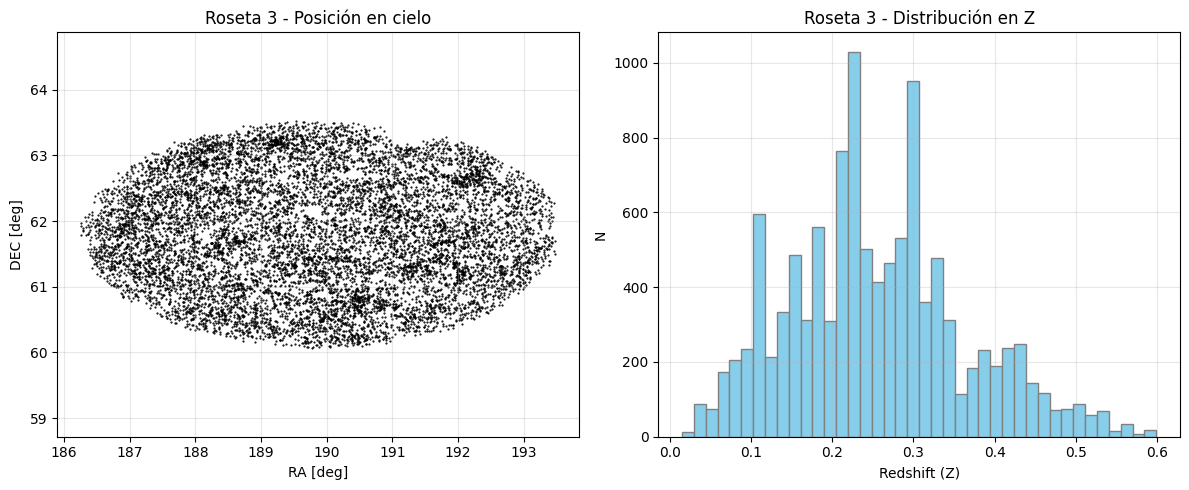

In [3]:
import numpy as np

roseta = 3
ii = data_N['ROSETTE_NUMBER'] == roseta

# Gráfico de RA vs DEC
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(data_N['RA'][ii], data_N['DEC'][ii], s=0.3, c='black')
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.title(f'Roseta {roseta} - Posición en cielo')
plt.axis('equal')
plt.grid(alpha=0.3)

# Histograma de Z
plt.subplot(1,2,2)
plt.hist(data_N['Z'][ii], bins=40, color='skyblue', edgecolor='gray')
plt.xlabel('Redshift (Z)')
plt.ylabel('N')
plt.title(f'Roseta {roseta} - Distribución en Z')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [10]:
import matplotlib.pyplot as plt
import os

print("Guardando en:", os.path.abspath("visualizaciones"))

os.makedirs("visualizaciones", exist_ok=True)

north_rosetas = [3, 6, 7, 11, 12, 13, 14, 15, 18, 19]
south_rosetas = [0, 1, 2, 4, 5, 8, 9, 10, 16, 17]
all_rosetas = north_rosetas + south_rosetas

for roseta in all_rosetas:

    if roseta in north_rosetas:
        data = data_N
        hemi = "N"
    else:
        data = data_S
        hemi = "S"

    # Máscara para la roseta actual
    ii = data['ROSETTE_NUMBER'] == roseta

    
    plt.figure(figsize=(12, 5))

    # RA vs DEC
    plt.subplot(1, 2, 1)
    plt.scatter(data['RA'][ii], data['DEC'][ii], s=0.3, c='black')
    plt.xlabel('RA [deg]')
    plt.ylabel('DEC [deg]')
    plt.title(f'Roseta {roseta} ({hemi}) - Posición en cielo')
    plt.grid(alpha=0.3)
    plt.axis('equal')

    # Histograma de Z
    plt.subplot(1, 2, 2)
    plt.hist(data['Z'][ii], bins=40, color='skyblue', edgecolor='gray')
    plt.xlabel('Redshift (Z)')
    plt.ylabel('N')
    plt.title(f'Roseta {roseta} ({hemi}) - Distribución en Z')
    plt.grid(alpha=0.3)

    # Guardar
    plt.tight_layout()
    output_path = f"visualizaciones/BGS_roseta_{roseta}_{hemi}_sky_hist.png"
    plt.savefig(output_path, dpi=200)
    plt.close()

    print(f"Guardado: {output_path}")

    alt_dir = "../05_visualizaciones/sky_z_distribution"
    os.makedirs(alt_dir, exist_ok=True)

    alt_path = os.path.join(alt_dir, f"BGS_roseta_{roseta}_{hemi}_sky_hist.png")
    plt.savefig(alt_path, dpi=200)


📁 Estás guardando en: C:\Users\USUARIO\Desktop\CosmicWeb_BGS_ASTRA\02_exploracion\visualizaciones
Guardado: visualizaciones/BGS_roseta_3_N_sky_hist.png
Guardado: visualizaciones/BGS_roseta_6_N_sky_hist.png
Guardado: visualizaciones/BGS_roseta_7_N_sky_hist.png
Guardado: visualizaciones/BGS_roseta_11_N_sky_hist.png
Guardado: visualizaciones/BGS_roseta_12_N_sky_hist.png
Guardado: visualizaciones/BGS_roseta_13_N_sky_hist.png
Guardado: visualizaciones/BGS_roseta_14_N_sky_hist.png
Guardado: visualizaciones/BGS_roseta_15_N_sky_hist.png
Guardado: visualizaciones/BGS_roseta_18_N_sky_hist.png
Guardado: visualizaciones/BGS_roseta_19_N_sky_hist.png
Guardado: visualizaciones/BGS_roseta_0_S_sky_hist.png
Guardado: visualizaciones/BGS_roseta_1_S_sky_hist.png
Guardado: visualizaciones/BGS_roseta_2_S_sky_hist.png
Guardado: visualizaciones/BGS_roseta_4_S_sky_hist.png
Guardado: visualizaciones/BGS_roseta_5_S_sky_hist.png
Guardado: visualizaciones/BGS_roseta_8_S_sky_hist.png
Guardado: visualizaciones/BGS_r

<Figure size 640x480 with 0 Axes>

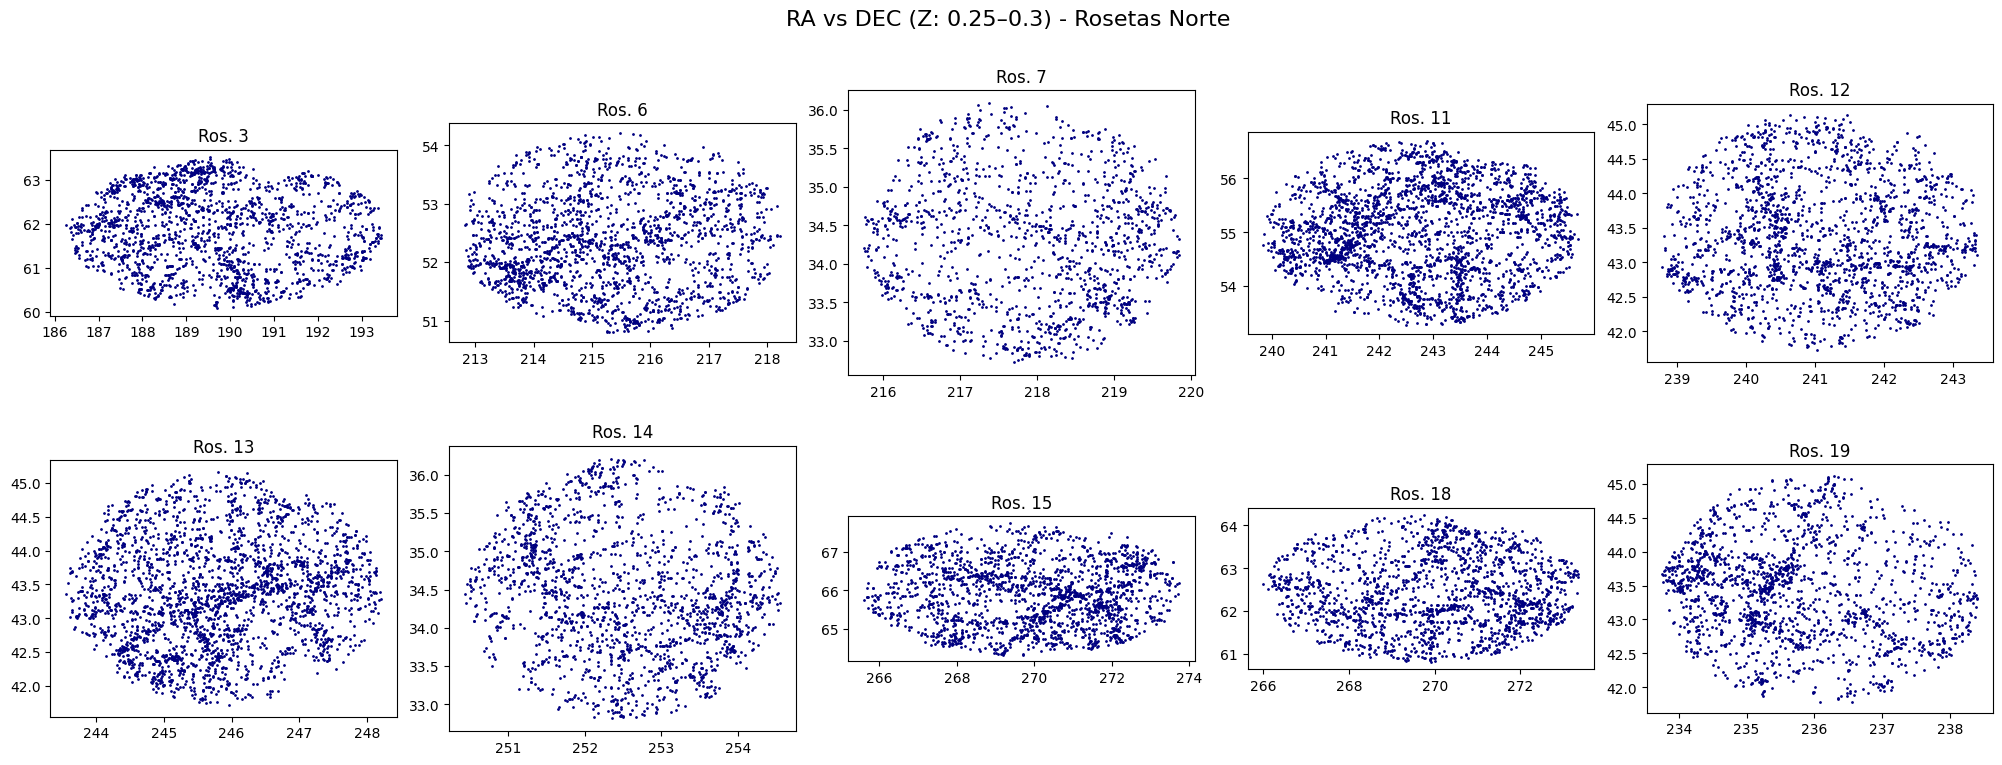

In [14]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
for i, ros in enumerate(north_rosetas):
    ax = axes.flat[i]
    mask = (data_N['ROSETTE_NUMBER'] == ros) & z_filter(data_N['Z'])
    ax.scatter(data_N['RA'][mask], data_N['DEC'][mask], s=1, color='navy')
    ax.set_title(f"Ros. {ros}")
    ax.set_aspect('equal', adjustable='box')
plt.suptitle("RA vs DEC (Z: 0.25–0.3) - Rosetas Norte", fontsize=16)
plt.tight_layout()
plt.show()


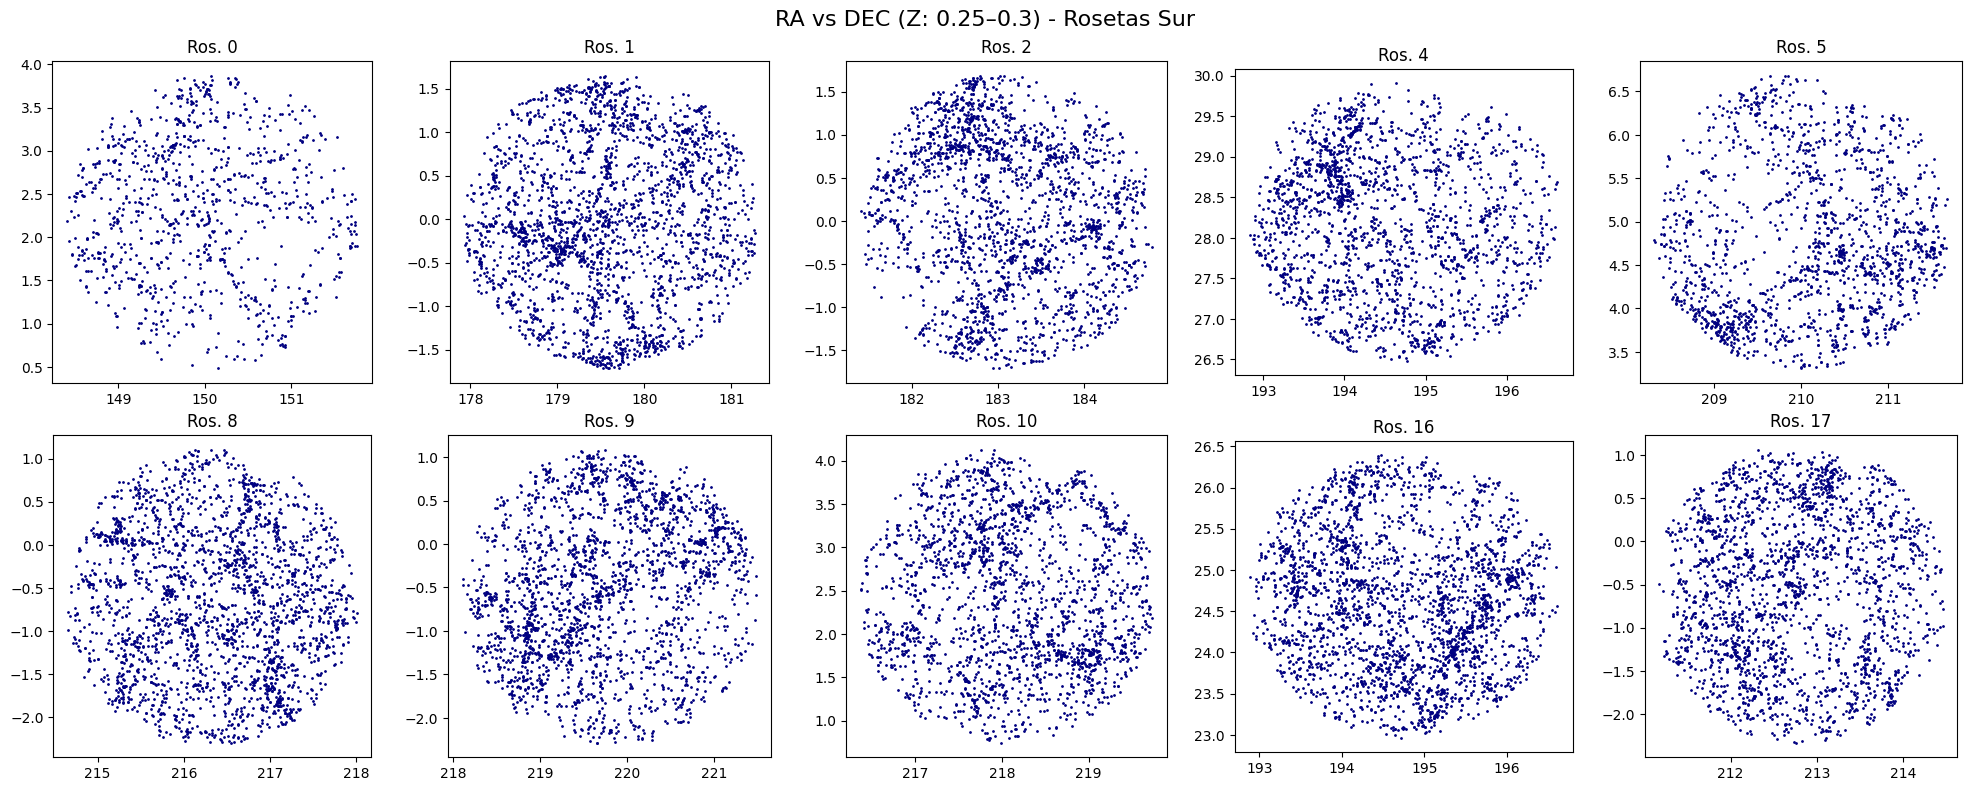

In [15]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
for i, ros in enumerate(south_rosetas):
    ax = axes.flat[i]
    mask = (data_S['ROSETTE_NUMBER'] == ros) & z_filter(data_S['Z'])
    ax.scatter(data_S['RA'][mask], data_S['DEC'][mask], s=1, color='navy')
    ax.set_title(f"Ros. {ros}")
    ax.set_aspect('equal', adjustable='box')
plt.suptitle("RA vs DEC (Z: 0.25–0.3) - Rosetas Sur", fontsize=16)
plt.tight_layout()
plt.show()


In [11]:
z_filter = lambda z: (z > 0.25) & (z < 0.3)

# NORTH
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
for i, ros in enumerate(north_rosetas):
    ax = axes.flat[i]
    mask = (data_N['ROSETTE_NUMBER'] == ros) & z_filter(data_N['Z'])
    ax.scatter(data_N['RA'][mask], data_N['DEC'][mask], s=1, color='navy')
    ax.set_title(f"Ros. {ros}")
    ax.grid(alpha=0.3)
    ax.set_xlabel("RA")
    ax.set_ylabel("DEC")
plt.suptitle("RA vs DEC (Z: 0.25–0.3) - Rosetas Norte", fontsize=16)
plt.tight_layout()
plt.savefig("../05_visualizaciones/sky_z_distribution/BGS_N_RADECs_filtered.png", dpi=200)
plt.close()

# SOUTH
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
for i, ros in enumerate(south_rosetas):
    ax = axes.flat[i]
    mask = (data_S['ROSETTE_NUMBER'] == ros) & z_filter(data_S['Z'])
    ax.scatter(data_S['RA'][mask], data_S['DEC'][mask], s=1, color='darkgreen')
    ax.set_title(f"Ros. {ros}")
    ax.grid(alpha=0.3)
    ax.set_xlabel("RA")
    ax.set_ylabel("DEC")
plt.suptitle("RA vs DEC (Z: 0.25–0.3) - Rosetas Sur", fontsize=16)
plt.tight_layout()
plt.savefig("../05_visualizaciones/sky_z_distribution/BGS_S_RADECs_filtered.png", dpi=200)
plt.close()


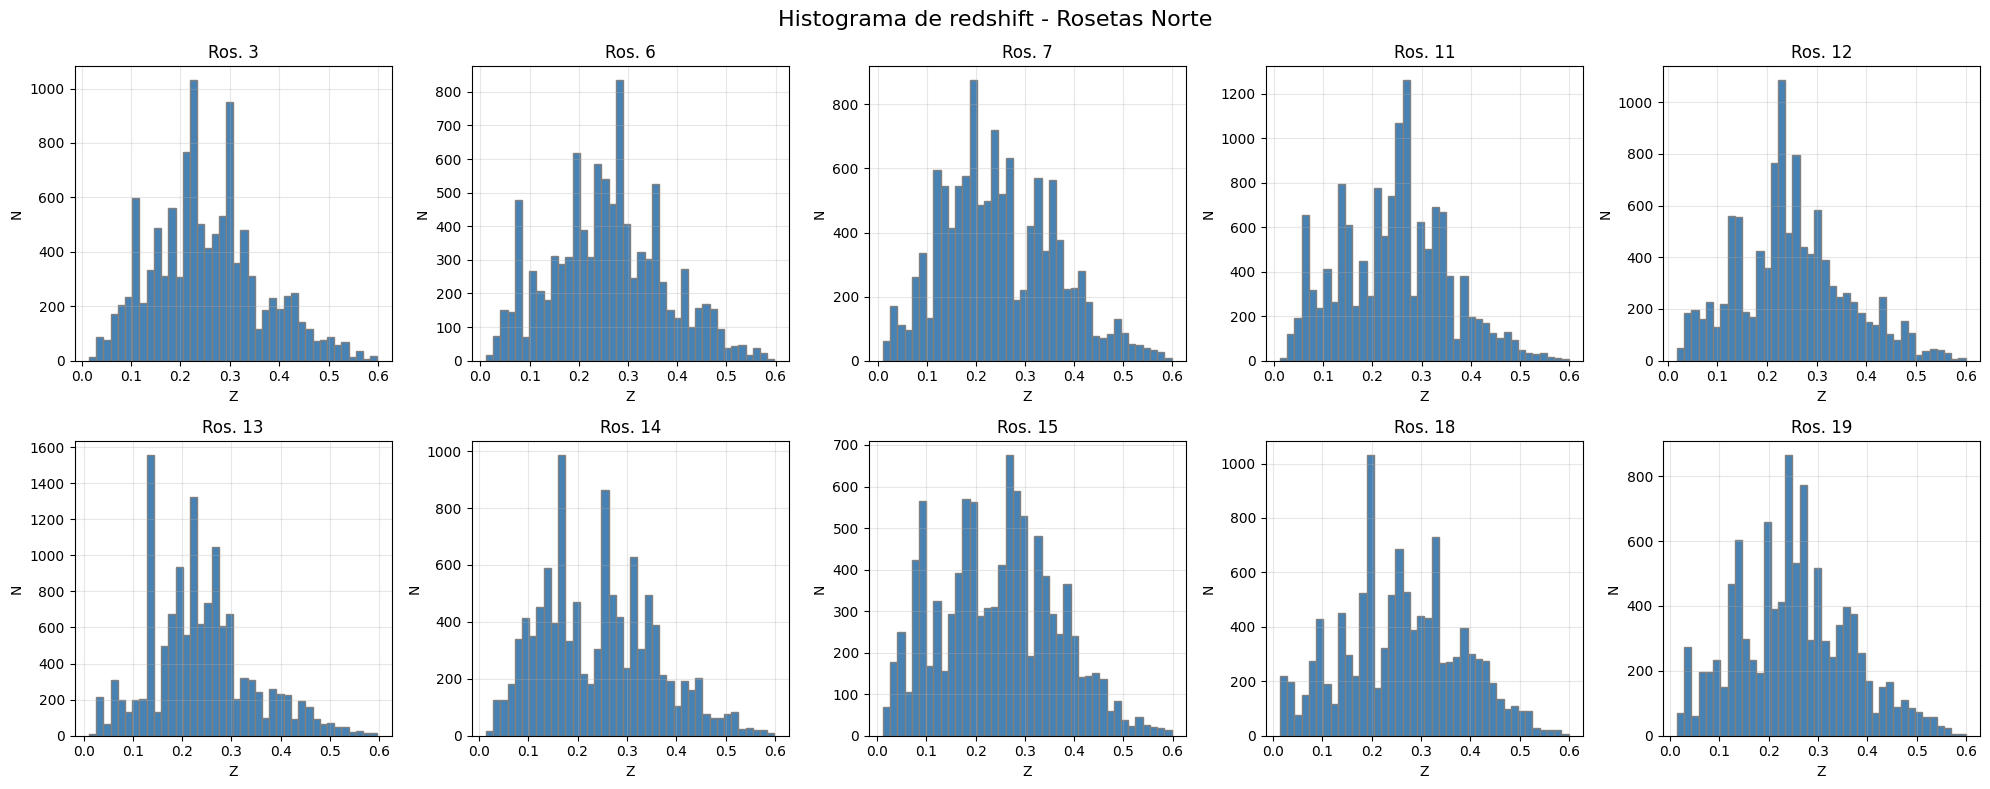

In [13]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
for i, ros in enumerate(north_rosetas):
    ax = axes.flat[i]
    mask = data_N['ROSETTE_NUMBER'] == ros
    ax.hist(data_N['Z'][mask], bins=40, color='steelblue', edgecolor='gray')
    ax.set_title(f"Ros. {ros}")
    ax.grid(alpha=0.3)
    ax.set_xlabel('Z')
    ax.set_ylabel('N')
plt.suptitle("Histograma de redshift - Rosetas Norte", fontsize=16)
plt.tight_layout()
plt.show()

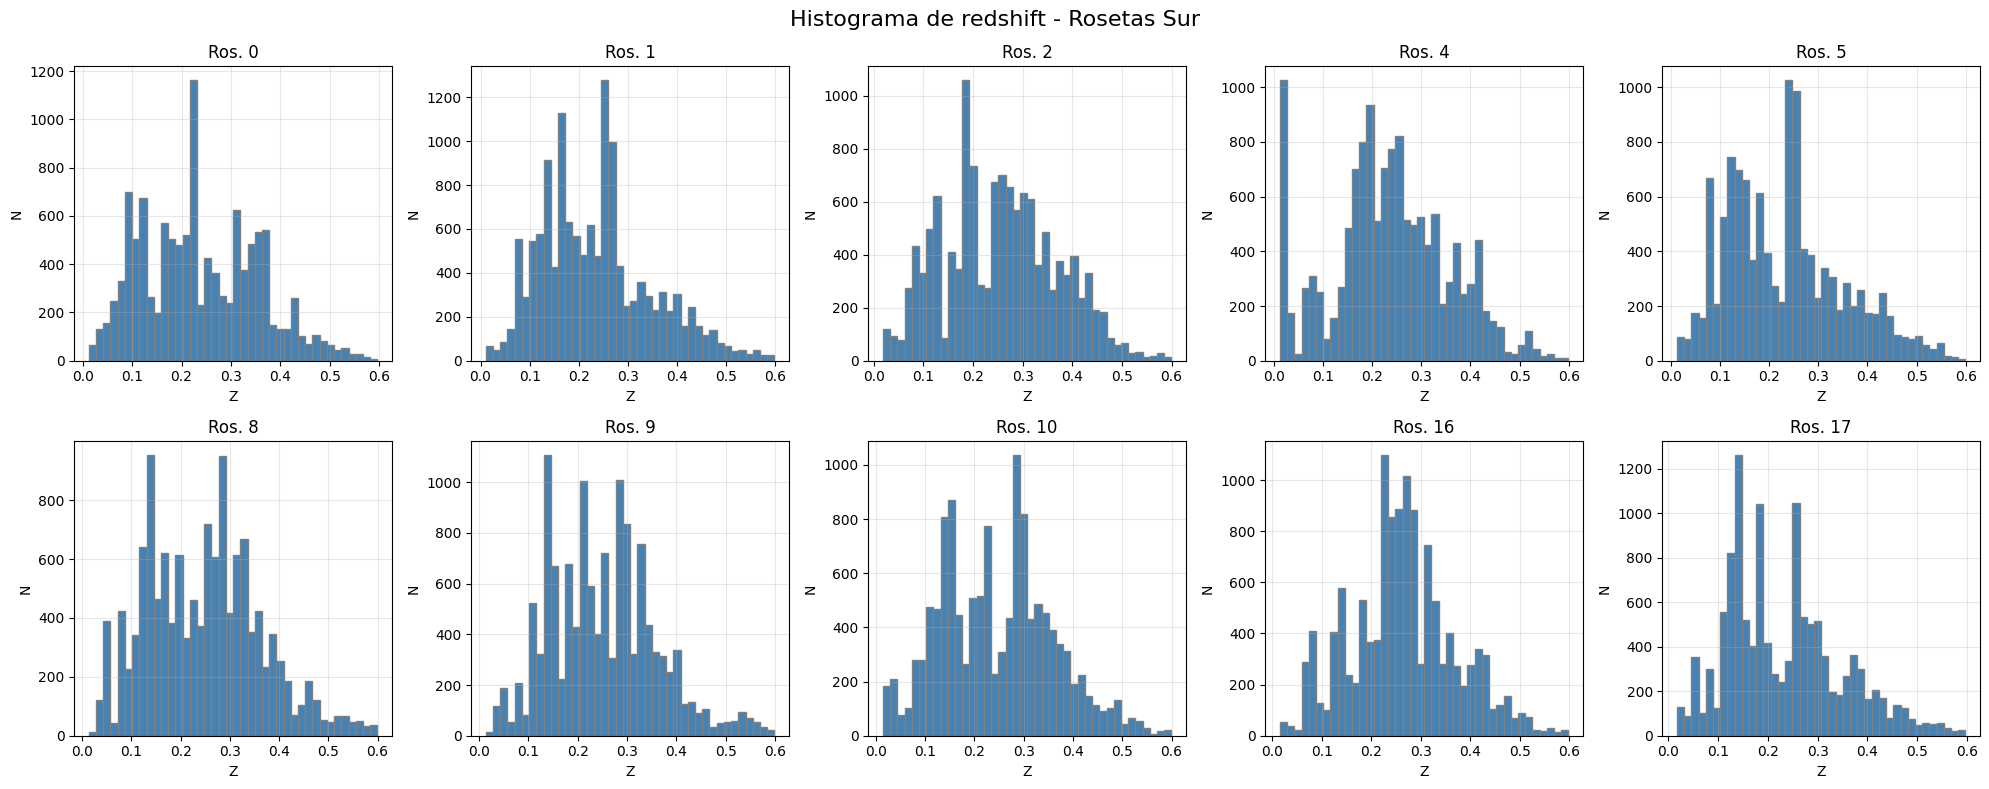

In [17]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
for i, ros in enumerate(south_rosetas):
    ax = axes.flat[i]
    mask = data_S['ROSETTE_NUMBER'] == ros
    ax.hist(data_S['Z'][mask], bins=40, color='steelblue', edgecolor='gray')
    ax.set_title(f"Ros. {ros}")
    ax.grid(alpha=0.3)
    ax.set_xlabel('Z')
    ax.set_ylabel('N')
plt.suptitle("Histograma de redshift - Rosetas Sur", fontsize=16)
plt.tight_layout()
plt.show()

In [18]:
# NORTH
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
for i, ros in enumerate(north_rosetas):
    ax = axes.flat[i]
    mask = data_N['ROSETTE_NUMBER'] == ros
    ax.hist(data_N['Z'][mask], bins=40, color='steelblue', alpha=0.8)
    ax.set_title(f"Ros. {ros}")
    ax.grid(alpha=0.3)
plt.suptitle("Histogramas de Z - Rosetas Norte", fontsize=16)
plt.tight_layout()
plt.savefig("../05_visualizaciones/sky_z_distribution/BGS_N_histograms.png", dpi=200)
plt.close()

# SOUTH
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
for i, ros in enumerate(south_rosetas):
    ax = axes.flat[i]
    mask = data_S['ROSETTE_NUMBER'] == ros
    ax.hist(data_S['Z'][mask], bins=40, color='teal', alpha=0.8)
    ax.set_title(f"Ros. {ros}")
    ax.grid(alpha=0.3)
plt.suptitle("Histogramas de Z - Rosetas Sur", fontsize=16)
plt.tight_layout()
plt.savefig("../05_visualizaciones/sky_z_distribution/BGS_S_histograms.png", dpi=200)
plt.close()
